## Assignment 2

### Plot - Temperature vs Time

I need to import appropriate packages

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd


Load the data from the csv file

In [14]:
file = 'weatherredings1.csv'
weather = pd.read_csv(file)

Data is now loaded and I can inspect it

In [15]:
weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

I will use **'dewPointTemperature_Celsius'** as the temperature data

In [16]:
temperature = weather['dewPointTemperature_Celsius']
print(temperature)

0     10.555556
1     10.833333
2     10.388889
3      9.888889
4      9.722222
        ...    
84    10.777778
85    11.000000
86    10.944444
87    10.833333
88    10.833333
Name: dewPointTemperature_Celsius, Length: 89, dtype: float64


I will use column **'reportEndDateTime'** as a time data
As this is an object I will need to convert it to date time format 

In [17]:
time = pd.to_datetime(weather['reportEndDateTime'])
print(time)

0    2024-10-02 16:15:00+00:00
1    2024-10-02 16:45:00+00:00
2    2024-10-02 17:00:00+00:00
3    2024-10-02 17:15:00+00:00
4    2024-10-02 17:30:00+00:00
                ...           
84   2024-10-03 14:00:00+00:00
85   2024-10-03 14:15:00+00:00
86   2024-10-03 14:30:00+00:00
87   2024-10-03 14:45:00+00:00
88   2024-10-03 15:00:00+00:00
Name: reportEndDateTime, Length: 89, dtype: datetime64[ns, UTC]


I want to find out average temperature.

In [18]:
av_temp = temperature.mean()
print (av_temp)

9.225967540574281


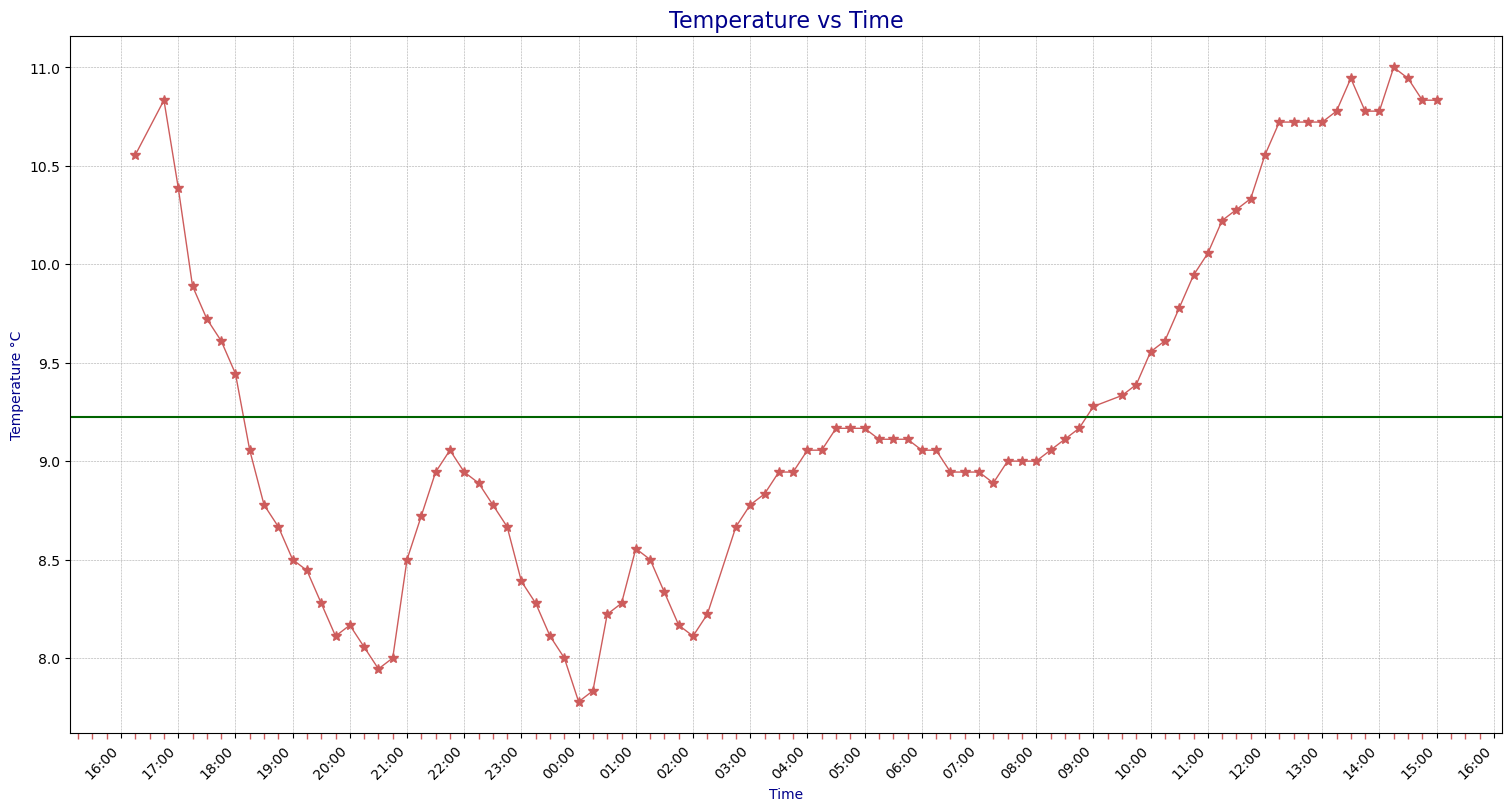

In [19]:
fig, ax = plt.subplots (figsize =(15,8), layout = "constrained")

ax.plot(time, temperature, color ="indianred", marker ="*", markersize = 7, linewidth= 1.0)

ax.set_title("Temperature vs Time", color ='darkblue', fontsize = 16)
ax.set_xlabel("Time", color ='darkblue', fontsize = 10)
ax.set_ylabel("Temperature °C", color ='darkblue', fontsize = 10)
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', zorder=-15)

mfmt = md.DateFormatter('%H:%M') # setting up the time, only hours and minutes will be displayed
ax.xaxis.set_major_formatter(mfmt)

xloc = md.HourLocator(interval= 1) # setting up major locator after each hour
ax.xaxis.set_major_locator(xloc)

from matplotlib.ticker import AutoMinorLocator # setting up minor locator for every 15 min
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which ='minor', length=4, width = 1, color ='indianred') #setting parameters for minor locator

ax.axhline(av_temp, color ="darkgreen") # adding horizontal line representing average temperature

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()

## References:

- [Minor Locator](https://kanoki.org/matplotlib-xticks-every-hour-and-every-15-30-mins-starting-on-hour)
- [Date Formatter](https://matplotlib.org/stable/gallery/ticks/date_formatters_locators.html)
- [Add a horizontal line](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html)